In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt

In [4]:
dataset = mnist.load_data()
(X_train, y_train), (X_test, y_test) = dataset

print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

# Flatten the inputs
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert the target to one-hot encoding
number_of_classes = 10
y_train = to_categorical(y_train, num_classes=number_of_classes)
y_test = to_categorical(y_test, num_classes=number_of_classes)

print("shape of X =", X_train.shape)
print("shape of y =", y_train.shape)

shape of X = (60000, 28, 28)
shape of y = (60000,)
shape of X = (60000, 784)
shape of y = (60000, 10)


In [5]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

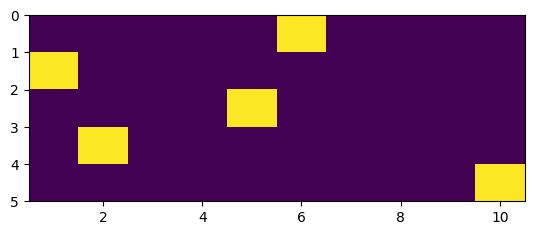

In [6]:
plt.imshow(y_train[:5], extent=[0.5, 10.5, y_train[:5].shape[0], 0], aspect=0.75)

In [7]:
# Define the model (API: Sequential, Functional, OOP)

In [8]:
model = Sequential()
model.add( Input(shape = (28*28,)) )
model.add( Dense(10, activation='sigmoid') ) #hidden layer: 'relu', 'tanh', LeakyRelu(alpha=0.1)
model.add( Dense(4, activation='sigmoid') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [9]:
# Compile the model
model.compile(optimizer='sgd', # 'adam'
              loss='categorical_crossentropy',
              metrics=['accuracy'])

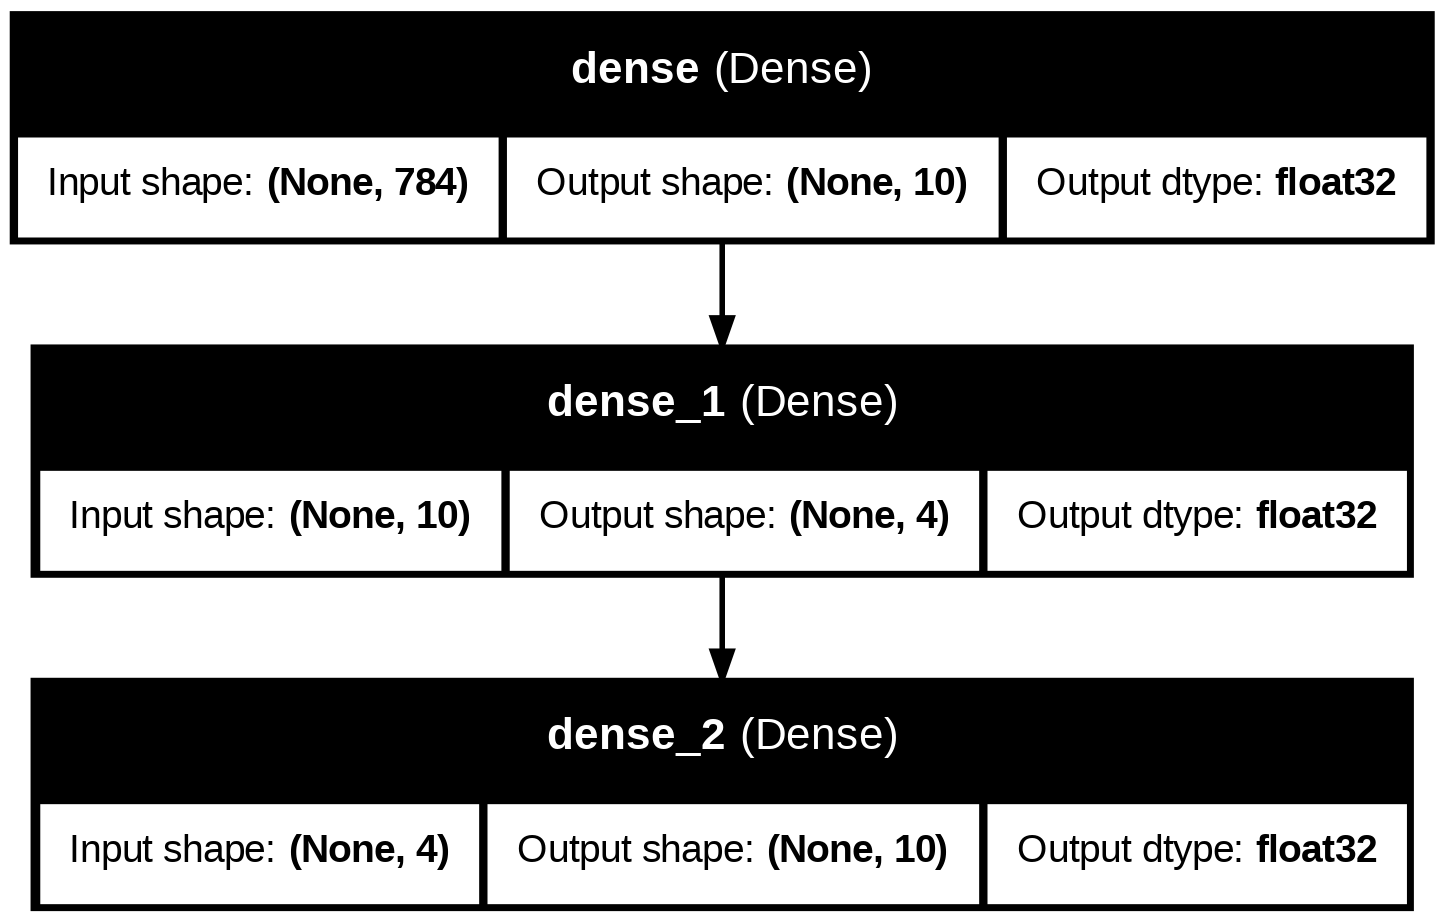

In [10]:
plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True)

In [11]:
# Trainning the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=1)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2007 - loss: 2.2263 - val_accuracy: 0.4764 - val_loss: 2.0328
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4298 - loss: 1.9798 - val_accuracy: 0.5109 - val_loss: 1.8022
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.4945 - loss: 1.7610 - val_accuracy: 0.6017 - val_loss: 1.6289
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5663 - loss: 1.5953 - val_accuracy: 0.6491 - val_loss: 1.4643
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6042 - loss: 1.4687 - val_accuracy: 0.5929 - val_loss: 1.3777
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6203 - loss: 1.3592 - val_accuracy: 0.6253 - val_loss: 1.2950
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6573 - loss: 1.2920 - val_accuracy: 0.6770 - val_loss: 1.2275
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6630 - loss: 1.2295 - 

In [12]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
y_pred.shape

(10000, 10)

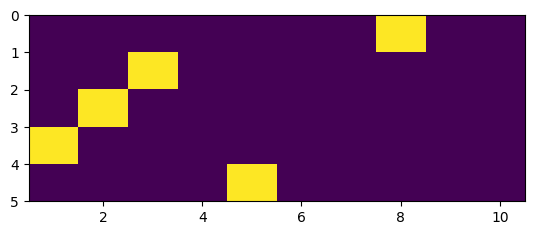

In [14]:
plt.imshow(y_test[:5], extent=[0.5, 10.5, y_test[:5].shape[0], 0], aspect=0.75)

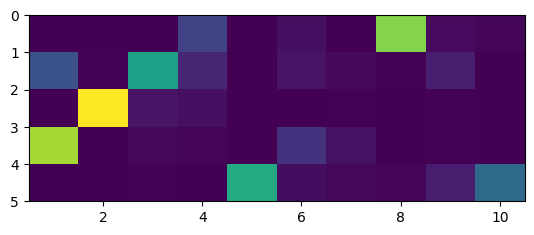

In [15]:
# y_pred[:5]
plt.imshow(y_pred[:5], extent=[0.5, 10.5, y_pred[:5].shape[0], 0], aspect=0.75)

In [16]:
import numpy as np
y_predicted = np.argmax(y_pred, axis=1)
y_predicted[:5]

array([7, 2, 1, 0, 4])

In [17]:
# y_test

In [18]:
y_actual = np.argmax(y_test, axis=1)
print(y_actual[:5])

[7 2 1 0 4]


In [19]:
acc_testing = np.mean(y_actual == y_predicted)*100
print("Testing accuracy (%) =", acc_testing)

Testing accuracy (%) = 80.67999999999999


In [20]:
loss_test, pred_test = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7899 - loss: 0.7753


In [21]:
print("Testing accuracy (%) =", pred_test*100)

Testing accuracy (%) = 80.68000078201294


# Best model from keras-tuner library

In [22]:
# Best model so far
model = Sequential()
model.add( Input(shape = (784,)) )
model.add( Dense(256, activation='tanh') ) #hidden layer
model.add( Dense(128, activation='tanh') ) #hidden layer
model.add( Dense(64, activation='tanh') ) #hidden layer
model.add( Dense(32, activation='tanh') ) #hidden layer
model.add( Dense(number_of_classes, activation='softmax') ) #output layer, activation must be softmax

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
model.fit(X_train, y_train, validation_data=(X_test, y_test),  verbose=1, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.7950 - loss: 0.6830 - val_accuracy: 0.8433 - val_loss: 0.4732
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8592 - loss: 0.4408 - val_accuracy: 0.8602 - val_loss: 0.4393
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8789 - loss: 0.3747 - val_accuracy: 0.9015 - val_loss: 0.3068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8988 - loss: 0.3203 - val_accuracy: 0.9017 - val_loss: 0.2933
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9086 - loss: 0.2862 - val_accuracy: 0.9143 - val_loss: 0.2754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9128 - loss: 0.2814 - val_accuracy: 0.9172 - val_loss: 0.2586
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9133 - loss: 0.2688 - val_accuracy: 0.9205 - val_loss: 0.2650
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9143 - loss: 0

In [25]:
loss, acc = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9097 - loss: 0.2873


In [26]:
print(acc*100)

91.92000031471252
